In [8]:
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_csv('BostonHousing.csv')

df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
x = df.drop('medv', axis=1)
y = df['medv']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape)

(404, 13) (102, 13)


In [13]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)

RMSE:  4.928602182665339


In [16]:
r2 = r2_score(y_test, y_pred)
print('R² score: ', r2)

R² score:  0.6687594935356317


In [17]:
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(results.head(10))


   Actual  Predicted
0    23.6  28.996724
1    32.4  36.025565
2    13.6  14.816944
3    22.8  25.031979
4    16.1  18.769880
5    20.0  23.254429
6    17.8  17.662538
7    14.0  14.341190
8    19.6  23.013207
9    16.8  20.632456


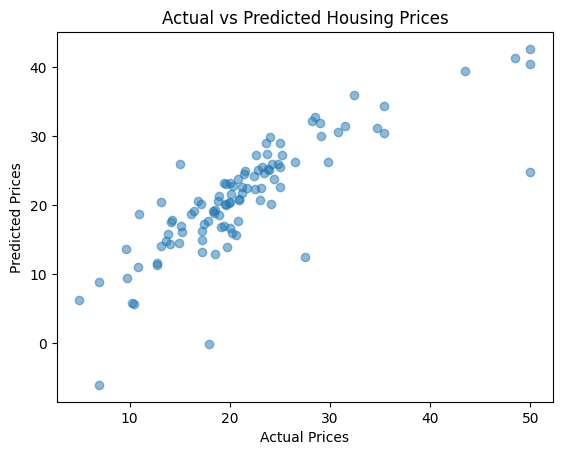

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()
